In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

In [2]:
# Read the data
df = pd.read_csv('datasets/dataset_mencion1.csv', parse_dates=['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   date                      100002 non-null  datetime64[ns, UTC]
 1   id                        100002 non-null  int64              
 2   rawContent                100002 non-null  object             
 3   replyCount                100002 non-null  int64              
 4   retweetCount              100002 non-null  int64              
 5   likeCount                 100002 non-null  int64              
 6   quoteCount                100002 non-null  int64              
 7   viewCount                 0 non-null       float64            
 8   lang                      100002 non-null  object             
 9   coordinates               3324 non-null    object             
 10  place                     3324 non-null    object             
 11  

In [4]:
# parse date
# df['date'] = pd.to_datetime(df['date'])
df['date_day'] = df['date'].dt.date
df['date_month'] = df['date'].dt.strftime('%Y-%m')

In [5]:
# set sns style
sns.set_style('whitegrid')
sns.set_palette('afmhot')

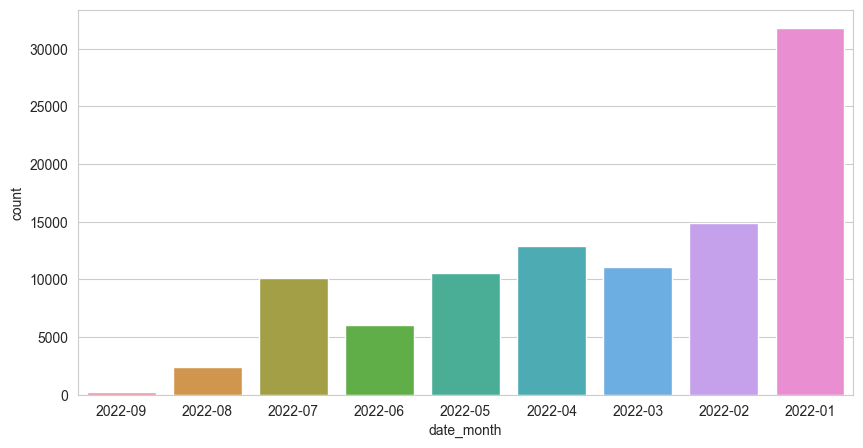

In [6]:
# basic plot de datos
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='date_month', data=df, ax=ax)
plt.show()

In [8]:
# analisis de sentimiento

classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

sentences = df['rawContent'].tolist()[:2000]

results = classifier(sentences)

marks ={}

for t, result in enumerate(results):
    marks[t] = {'label': result['label'], 'score': result['score']}

df_marks = pd.DataFrame.from_dict(marks, orient='index')

# merge marks with df
df = df.merge(df_marks, left_index=True, right_index=True)
df

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


,date,id,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount,lang,coordinates,...,user_join_date,user_followers,user_location,user_verified,inReplyToTweetId,date_day,date_month,sentiment,label,score
0,2022-09-03 23:36:16+00:00,1566208484160536576,15.1 millones de electores chilenos están obli...,3,10,37,1,NaN,es,NaN,...,2009-05-13 20:16:30+00:00,321175,Bogotá/Key Biscayne,True,NaN,2022-09-03,2022-09,0.000000,1 star,0.698736
1,2022-09-03 23:32:04+00:00,1566207427837628417,#Chile Acá podrán seguir todos los datos respe...,0,0,0,0,NaN,es,NaN,...,2022-05-06 00:08:36+00:00,772,NaN,False,NaN,2022-09-03,2022-09,0.000000,1 star,0.372964
2,2022-09-03 23:12:21+00:00,1566202468878503936,@Rodolfo62949483 @Dany41135077 De aprobar o no...,1,1,1,0,NaN,es,NaN,...,2022-07-05 21:03:56+00:00,13170,NaN,False,1.566200e+18,2022-09-03,2022-09,0.000000,1 star,0.909161
3,2022-09-03 23:07:47+00:00,1566201318741385216,@bdelamaza Que más se podía esperar de un FACH...,0,0,0,0,NaN,es,NaN,...,2021-11-21 17:17:12+00:00,123,NaN,False,1.565893e+18,2022-09-03,2022-09,0.000000,1 star,0.447453
4,2022-09-03 23:05:51+00:00,1566200833225678850,Este domingo 4 de septiembre se llevará a cabo...,0,0,0,0,NaN,es,NaN,...,2019-10-21 21:08:32+00:00,60,Santiago de Chile,False,NaN,2022-09-03,2022-09,0.000000,1 star,0.477174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2022-09-01 15:04:10+00:00,1565354834894528513,El payasito Orrego voto en contra de una nueva...,0,0,2,0,NaN,es,NaN,...,2016-08-29 19:58:20+00:00,688,"Orlando, FL",False,NaN,2022-09-01,2022-09,0.000000,1 star,0.579348
196,2022-09-01 14:52:18+00:00,1565351848290054148,.. naciones”.\nExiste un amplio consenso en C...,1,0,2,0,NaN,es,NaN,...,2009-02-26 00:16:09+00:00,231,Lima Peru,False,1.565352e+18,2022-09-01,2022-09,0.000000,1 star,0.680891
197,2022-09-01 14:44:44+00:00,1565349947037614082,Ante la grave crisis política y social del paí...,0,0,0,0,NaN,es,NaN,...,2009-12-07 13:31:51+00:00,158,Santiago de Chile,False,NaN,2022-09-01,2022-09,0.033333,1 star,0.342301
198,2022-09-01 14:38:18+00:00,1565348325200576512,"Casi tres años después del estallido social, t...",1,9,19,0,NaN,es,NaN,...,2017-08-07 20:42:19+00:00,35975,Ecuador,False,1.565348e+18,2022-09-01,2022-09,0.033333,1 star,0.460599


In [9]:
df.to_clipboard()

In [ ]:
# plot sentimiento
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x='date_day', y='sentiment', data=df, ax=ax, alpha=0.8)
plt.show()

In [ ]:
# plot sentimiento
avg_day = df[['date_day', 'sentiment']].groupby('date_day').mean()

fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=avg_day.index, y='sentiment', data=avg_day, ax=ax)
plt.show()